In [1]:
import jax.numpy as jnp
from jax import random
from melvin.model import BasicModel
from jax.experimental.optimizers import adam, sgd
import jax
import matplotlib.pylab as plt
from functools import partial

In [2]:
SEED = random.PRNGKey(123068)
N_ROWS = 2000
N_PARAMS = 50
NOISE_AMPLITUDE = 2.0

In [3]:
SEED, _seed = random.split(SEED)
true_params = jax.random.normal(key=_seed, shape=(N_PARAMS,))
print(f"True parameters\n{true_params}")

SEED, _seed = random.split(SEED)
X = jax.random.normal(key=_seed, shape=(N_ROWS, N_PARAMS))
print(f"\nFirst 2 rows of data\n{X[:2,:]}")

SEED, _seed = random.split(SEED)
eps = NOISE_AMPLITUDE*jax.random.normal(key=_seed, shape=(N_ROWS,))
y = X @ true_params + eps
print(f"\nFirst 2 labels\n{y[:2]}")

True parameters
[ 1.1030911  -0.12582235  0.79887617  0.08826711 -0.4428486  -1.0273352
  0.98168045 -0.2173722   0.39925107  0.46206483 -0.63087773  0.6986454
 -1.6544454  -1.6538117   0.7513252  -0.6921548   0.21442401  1.6987721
 -1.4438615  -0.9324933  -0.44780692  0.39018837  0.41284898 -2.0340323
 -0.86483675 -1.3993618  -1.6581275   0.757874    0.7903442  -0.2212733
 -0.7566123  -0.41782844 -0.09348348 -1.5031604   0.39310622 -0.4433641
 -0.96864146 -0.29593575 -0.8976902   0.8097607   0.81653595 -0.55653095
  0.9940069  -0.4437845   0.9906007  -0.31926188 -0.29112086  0.24573919
  2.3314097  -0.1803673 ]

First 2 rows of data
[[ 0.81490767  0.8455855  -0.64872897  0.42107993  0.19656257 -0.62863076
  -1.6738462   0.3146641   0.7520565  -1.5034648  -0.87624586 -1.092061
  -1.5399548   0.5584085   0.9860494  -0.28816238  0.0394838  -0.07932603
  -0.4646541   1.9129742  -1.050417   -0.2774588  -1.9091797  -1.7998327
  -0.18067619 -3.0194058   0.91955274 -0.15124622  0.4305154   0.

In [4]:
def model_fn(params, X):
    return X @ params

def loss_fn(y, y_pred, params):
    return jnp.mean((y - y_pred)**2)

SEED, _seed = random.split(SEED)
initial_params = jax.random.normal(key=_seed, shape=(N_PARAMS,))

linear_model = BasicModel(
    name="Linear Model",
    model_fn=model_fn,
    loss_fn=loss_fn,
    initial_params=initial_params,
    optimizer=sgd,
    optimizer_kwargs={"step_size": 0.01}
)

linear_model.fit(n_steps=200, X=X, y=y)

Linear Model: 100%|██████████| 200/200 [00:00<00:00, 346.77it/s]


<AxesSubplot:title={'center':'History'}, xlabel='Iteration', ylabel='Loss'>

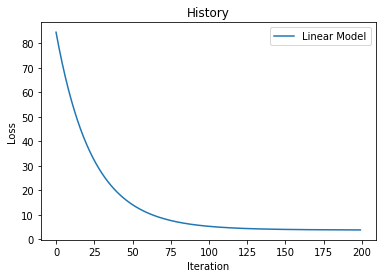

In [5]:
linear_model.plot_history()

In [6]:
print(f"True parameters\n{true_params}")
print(f"\nFitted parameters\n{linear_model.params}")

True parameters
[ 1.1030911  -0.12582235  0.79887617  0.08826711 -0.4428486  -1.0273352
  0.98168045 -0.2173722   0.39925107  0.46206483 -0.63087773  0.6986454
 -1.6544454  -1.6538117   0.7513252  -0.6921548   0.21442401  1.6987721
 -1.4438615  -0.9324933  -0.44780692  0.39018837  0.41284898 -2.0340323
 -0.86483675 -1.3993618  -1.6581275   0.757874    0.7903442  -0.2212733
 -0.7566123  -0.41782844 -0.09348348 -1.5031604   0.39310622 -0.4433641
 -0.96864146 -0.29593575 -0.8976902   0.8097607   0.81653595 -0.55653095
  0.9940069  -0.4437845   0.9906007  -0.31926188 -0.29112086  0.24573919
  2.3314097  -0.1803673 ]

Fitted parameters
[ 1.0996614  -0.14292608  0.83563864  0.1432994  -0.43987995 -0.9870357
  0.9193747  -0.16540247  0.36863726  0.41282058 -0.55246377  0.6850115
 -1.5930638  -1.5847492   0.78805804 -0.7189341   0.25882062  1.6086905
 -1.3475164  -0.89192307 -0.5078004   0.32133043  0.39045697 -2.0641067
 -0.85983294 -1.3781365  -1.5817019   0.68162036  0.82965744 -0.12365599
